In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data,train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value)in word_index.items()])
decoded_review= ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [24]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)


In [25]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [26]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [28]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


Instructions for updating:
Colocations handled automatically by placer.


In [29]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])


In [31]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [35]:
history = model.fit(partial_x_train,
         partial_y_train,
         epochs=20,
         batch_size=512,
         validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 219us/step - loss: 0.0030 - acc: 0.9999 - val_loss: 0.7309 - val_acc: 0.8629
Epoch 2/20
15000/15000 [==============================] - 3s 212us/step - loss: 0.0061 - acc: 0.9985 - val_loss: 0.7524 - val_acc: 0.8640
Epoch 3/20
15000/15000 [==============================] - 3s 217us/step - loss: 0.0019 - acc: 0.9999 - val_loss: 0.7805 - val_acc: 0.8630
Epoch 4/20
15000/15000 [==============================] - 3s 215us/step - loss: 0.0053 - acc: 0.9985 - val_loss: 0.8218 - val_acc: 0.8613
Epoch 5/20
15000/15000 [==============================] - 3s 226us/step - loss: 0.0012 - acc: 0.9999 - val_loss: 0.8410 - val_acc: 0.8605
Epoch 6/20
15000/15000 [==============================] - 3s 224us/step - loss: 0.0030 - acc: 0.9995 - val_loss: 0.8728 - val_acc: 0.8612
Epoch 7/20
15000/15000 [==============================] - 3s 217us/step - loss: 7.2470e-04 - acc: 0.9999 - val_loss: 0.889

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

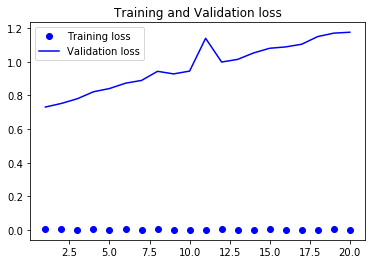

In [36]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel = ('Epoch')
plt.ylabel = ('Loss')
plt.legend()

plt.show()

In [37]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 4s 169us/step


In [38]:
results

[1.3049260617446898, 0.84088]

In [39]:
model.predict(x_test)

array([[4.2676926e-05],
       [1.0000000e+00],
       [9.9798399e-01],
       ...,
       [4.2319298e-06],
       [6.9633126e-04],
       [9.3176681e-01]], dtype=float32)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 284us/step - loss: 0.5085 - acc: 0.7818 - val_loss: 0.3798 - val_acc: 0.8687
Epoch 2/20
15000/15000 [==============================] - 3s 220us/step - loss: 0.3004 - acc: 0.9045 - val_loss: 0.3002 - val_acc: 0.8900
Epoch 3/20
15000/15000 [==============================] - 3s 205us/step - loss: 0.2179 - acc: 0.9281 - val_loss: 0.3084 - val_acc: 0.8715
Epoch 4/20
15000/15000 [==============================] - 3s 203us/step - loss: 0.1750 - acc: 0.9436 - val_loss: 0.2840 - val_acc: 0.8837
Epoch 5/20
15000/15000 [==============================] - 3s 204us/step - loss: 0.1426 - acc: 0.9543 - val_loss: 0.2847 - val_acc: 0.8869
Epoch 6/20
15000/15000 [==============================] - 3s 203us/step - loss: 0.1151 - acc: 0.9652 - val_loss: 0.3133 - val_acc: 0.8782
Ep

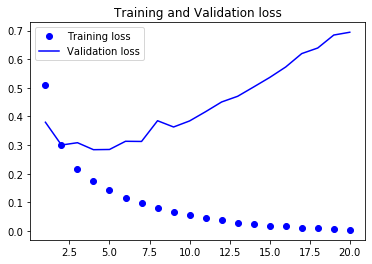

25000/25000 [==============================] - 4s 159us/step
[0.7640653516554833, 0.8504]
[[0.00954583]
 [0.9999998 ]
 [0.9737609 ]
 ...
 [0.00233293]
 [0.00659049]
 [0.65057784]]


In [1]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt

#一、加载IMDB数据集
(train_data,train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

#二、准备数据，对训练和测试数据及标签向量化
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#三、网络搭建
#1.定义模型
model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
#2.编译模型
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])


#四、模型训练与验证
#1.训练模型
history = model.fit(partial_x_train,
         partial_y_train,
         epochs=20,
         batch_size=512,
         validation_data=(x_val, y_val))
#2.绘制图像
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel = ('Epoch')
plt.ylabel = ('Loss')
plt.legend()

plt.show()

#3.查看测试集性能
results = model.evaluate(x_test, y_test)
print(results)

#4.查看预测结果
print(model.predict(x_test))


In [6]:
from keras.datasets import reuters
#一、加载路透社数据集
(train_data,train_labels), (test_data,test_labels) = reuters.load_data(num_words=10000)
len(train_data)

8982

In [7]:
len(test_data)

2246

In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value)in word_index.items()])
decoded_review= ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? ? ? to just br loved and you i've set and broke many was friends seems him see of how and with movies a with know that him see people film guess are of if the some to okay from without old a though a into in that film thing in that of if is scarecrow outside days a found a looks in that film these about in that was to thought 100 him see good he without be all man a character that as it"

In [9]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [ ]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt

#一、加载路透社数据集
(train_data,train_labels), (test_data,test_labels) = retuers.load_data(num_words=10000)

#二、准备数据，对训练和测试数据及标签向量化
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#三、网络搭建
#1.定义模型
model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
#2.编译模型
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])


#四、模型训练与验证
#1.训练模型
history = model.fit(partial_x_train,
         partial_y_train,
         epochs=20,
         batch_size=512,
         validation_data=(x_val, y_val))
#2.绘制图像
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel = ('Epoch')
plt.ylabel = ('Loss')
plt.legend()

plt.show()

#3.查看测试集性能
results = model.evaluate(x_test, y_test)
print(results)

#4.查看预测结果
print(model.predict(x_test))
